In [4]:
#!unzip "/content/drive/MyDrive/Brain Tumor sana/brain-tumor-detection.zip" -d "/content/drive/MyDrive/Brain Tumor sana"

In [1]:
import numpy as np
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator

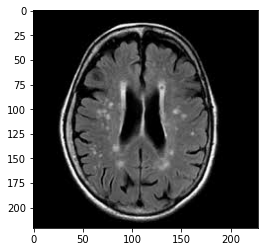

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as img

image = img.imread('./brain-tumor-detection/1.jpg')
plt.imshow(image)
plt.show()

In [45]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True)
#"/content/drive/MyDrive/Brain Tumor sana/Dataset/train"
#train = "./brain-tumor-detection/Datase/train"
#train="F:/ML/Brain Tumor Detection/brain-tumor-detection/Dataset/train"
train="F:/ML/Brain Tumor Detection/brain-tumor-detection/Dataset/train"
training_set = train_datagen.flow_from_directory(train, target_size=(224,224),
                                                 batch_size=32,shuffle=True,class_mode='binary')


Found 215 images belonging to 2 classes.


In [25]:
test = "F:/ML/Brain Tumor Detection/brain-tumor-detection/Dataset/test"
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test, target_size=(224,224),
                                            batch_size=16,shuffle=False,class_mode='binary')


Found 32 images belonging to 2 classes.


In [26]:
cnn = tf.keras.models.Sequential()
 
cnn.add(tf.keras.layers.Conv2D(filters=224 , kernel_size=3 , activation='relu' , input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
 
cnn.add(tf.keras.layers.Conv2D(filters=224 , kernel_size=3 , activation='relu' ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2 , strides=2))
 
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1 , activation='sigmoid'))


cnn.compile(optimizer = 'Adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [27]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 224)     6272      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 224)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 224)     451808    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 224)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 54, 54, 224)       0         
                                                                 
 flatten (Flatten)           (None, 653184)            0

In [46]:
215/32

6.71875

In [28]:
cnn.fit(x = training_set , validation_data = test_set , epochs = 10)

Epoch 1/10
7/7 [==============================] - 40s 5s/step - loss: 4.0066 - accuracy: 0.4279 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 37s 5s/step - loss: 0.6927 - accuracy: 0.5628 - val_loss: 0.6912 - val_accuracy: 0.6875
Epoch 3/10
7/7 [==============================] - 37s 5s/step - loss: 0.6868 - accuracy: 0.5907 - val_loss: 0.6640 - val_accuracy: 0.7188
Epoch 4/10
7/7 [==============================] - 38s 5s/step - loss: 0.6721 - accuracy: 0.6884 - val_loss: 0.6235 - val_accuracy: 0.7188
Epoch 5/10
7/7 [==============================] - 38s 6s/step - loss: 0.6479 - accuracy: 0.7395 - val_loss: 0.5744 - val_accuracy: 0.7188
Epoch 6/10
7/7 [==============================] - 38s 5s/step - loss: 0.6174 - accuracy: 0.7442 - val_loss: 0.5488 - val_accuracy: 0.6875
Epoch 7/10
7/7 [==============================] - 37s 5s/step - loss: 0.5751 - accuracy: 0.7163 - val_loss: 0.5140 - val_accuracy: 0.6875
Epoch 8/10
7/7 [==================

In [29]:
training_set.class_indices

{'no': 0, 'yes': 1}

In [40]:
from keras.preprocessing import image
test_image = tf.keras.utils.load_img('F:/ML/Brain Tumor Detection/brain-tumor-detection/Dataset/prediction/yes1.jpg',
                                     target_size=(224,224))

test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
 
result = cnn.predict(test_image)
training_set.class_indices

print(result)

1/1 [==============================] - 0s 118ms/step
[[1.]]


In [41]:
if result[0][0] == 1:
    print('yes')
else:
    print('no')

yes
